# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [24]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label label_names  
0        0      setosa  
1        0      setosa  
2        0      setosa  
3        0      setosa  
4        0      setosa  
..     ...         ...  
145      2   virginica  
146      2   virginica  
147      2   virginica  
148      2   virginica  
149      2   virginica  

[150 rows x 6 columns]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
score_best = 0
k_best = 0
result_dict = {}
for i in np.arange(1,25):    
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    result_dict[f'k = {i}'] = f'score = {knn.score(X_test, y_test).round(3)}'
    
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

for i in np.arange(1, 25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    if score_best < knn.score(X_test_scaled, y_test):
        score_best = knn.score(X_test_scaled, y_test)
        k_best = i
    result_dict[f'k = {i}'] = knn.score(X_test_scaled, y_test).round(3)

In [27]:
print ('The best k = {} , score = {}'.format(k_best,score_best ))
print('\n',result_dict)

The best k = 3 , score = 0.9736842105263158

 {'k = 1': 0.921, 'k = 2': 0.947, 'k = 3': 0.974, 'k = 4': 0.974, 'k = 5': 0.974, 'k = 6': 0.974, 'k = 7': 0.974, 'k = 8': 0.974, 'k = 9': 0.974, 'k = 10': 0.974, 'k = 11': 0.974, 'k = 12': 0.974, 'k = 13': 0.974, 'k = 14': 0.974, 'k = 15': 0.974, 'k = 16': 0.974, 'k = 17': 0.974, 'k = 18': 0.974, 'k = 19': 0.921, 'k = 20': 0.947, 'k = 21': 0.947, 'k = 22': 0.947, 'k = 23': 0.921, 'k = 24': 0.947}


## Synthetic dataset  

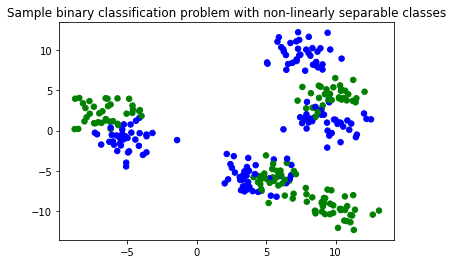

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

In [30]:
res = {}
arr = np.array([])
for i in np.arange(1,25):    
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    res[f'k = {i}'] = f'score = {knn.score(X_test, y_test).round(3)}'

In [31]:
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i in np.arange(1,30): 
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_scaled, y_train)
    arr = np.append(arr, knn.score(X_test_scaled, y_test).round(3))
    res[f'k = {i}'] = knn.score(X_test_scaled, y_test).round(3)

In [32]:
k = [[i+1, arr[i]] for i in range(len(arr)) if arr.max() == arr[i]]
k

[[18, 0.947], [25, 0.947], [26, 0.947]]

In [33]:
k_best = k[0][0] # 'compute the best k'
score_best = k[0][1] #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))
res

The best k = 18 , score = 0.947


{'k = 1': 0.933,
 'k = 2': 0.893,
 'k = 3': 0.893,
 'k = 4': 0.88,
 'k = 5': 0.907,
 'k = 6': 0.88,
 'k = 7': 0.933,
 'k = 8': 0.907,
 'k = 9': 0.92,
 'k = 10': 0.92,
 'k = 11': 0.907,
 'k = 12': 0.893,
 'k = 13': 0.893,
 'k = 14': 0.92,
 'k = 15': 0.893,
 'k = 16': 0.92,
 'k = 17': 0.933,
 'k = 18': 0.947,
 'k = 19': 0.933,
 'k = 20': 0.933,
 'k = 21': 0.933,
 'k = 22': 0.92,
 'k = 23': 0.92,
 'k = 24': 0.92,
 'k = 25': 0.947,
 'k = 26': 0.947,
 'k = 27': 0.933,
 'k = 28': 0.92,
 'k = 29': 0.92}